In [226]:
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_string_dtype, is_categorical_dtype
import matplotlib.pyplot as plt
import numpy as np

In [227]:
# importing data
row_data = pd.read_csv('movie_metadata.csv')
pd.set_option('display.max_columns', 500)

In [228]:
row_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [229]:
row_data.shape

(5043, 28)

In [230]:
# get information 
row_data.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,5043,5.043000e+03,5043.000000,5020,5030.000000,4890,5043,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,4917,NaN,NaN,3521,NaN,4760,4919,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,Pan,NaN,NaN,Ben Mendelsohn,NaN,based on novel,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,3,NaN,NaN,8,NaN,4,3,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,NaN,8.366816e+04,9699.063851,NaN,1.371173,NaN,NaN,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,NaN,1.384853e+05,18163.799124,NaN,2.013576,NaN,NaN,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,NaN,5.000000e+00,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,0.000000,NaN,NaN,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,1.000000,NaN,NaN,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,2.000000,NaN,NaN,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [231]:
# removing unecessary columns
columns_to_delete = ['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link']
new_data = row_data.drop(columns=columns_to_delete, axis=1)

In [232]:
new_data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [233]:
new_data.shape

(5043, 20)

# cleaning data & data preparation


In [234]:
def show_missing_values(df):
    print(df.isnull().sum().sort_values(0, False))

In [235]:
show_missing_values(new_data)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_facebook_likes        13
language                      12
actor_1_facebook_likes         7
country                        5
num_voted_users                0
cast_total_facebook_likes      0
imdb_score                     0
movie_facebook_likes           0
dtype: int64


In [236]:
# romoving duplicates rows
new_data.drop_duplicates(keep=False, inplace=True)

In [237]:
show_missing_values(new_data)

gross                        864
budget                       482
aspect_ratio                 325
content_rating               299
title_year                   106
director_facebook_likes      102
num_critic_for_reviews        48
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_facebook_likes        13
language                      12
actor_1_facebook_likes         7
country                        5
num_voted_users                0
cast_total_facebook_likes      0
imdb_score                     0
movie_facebook_likes           0
dtype: int64


In [238]:
# removing missing value from str columns
def remove_missing_value_for_str(df):
    for n,c in df.items():
        if is_string_dtype(c):
            sel_rows = df[n].isnull().values == False
            df = df[sel_rows]
    return df

In [239]:
new_data = remove_missing_value_for_str(new_data)

In [240]:
show_missing_values(new_data)

gross                        613
budget                       383
aspect_ratio                 184
title_year                    61
director_facebook_likes       61
num_critic_for_reviews        18
facenumber_in_poster          11
actor_3_facebook_likes         9
num_user_for_reviews           4
duration                       3
actor_2_facebook_likes         2
actor_1_facebook_likes         1
movie_facebook_likes           0
num_voted_users                0
cast_total_facebook_likes      0
language                       0
country                        0
content_rating                 0
imdb_score                     0
color                          0
dtype: int64


In [241]:
# replace zeros with median 
def replace_zeros(df):
    for n,c in df.items():
        if is_numeric_dtype(c) and n != 'facenumber_in_poster':
            df[n].replace(0, df[n].median(), inplace=True)

In [242]:
replace_zeros(new_data)

In [243]:
new_data.describe(include='all')

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4634,4616.000000,4631.000000,4573.000000,4625.000000,4633.000000,4.021000e+03,4.634000e+03,4634.000000,4623.000000,4630.000000,4634,4634,4634,4.251000e+03,4573.000000,4632.000000,4634.000000,4450.000000,4634.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,58,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4396,3566,2069,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,146.988735,107.966746,734.536409,669.234162,6790.925534,4.895805e+07,8.866875e+04,10058.270285,1.364049,287.200000,NaN,NaN,NaN,4.124166e+07,2002.143669,1721.202504,6.442943,2.176200,7988.408071
std,NaN,121.143236,23.730702,2893.971385,1666.605572,14577.623655,6.775258e+07,1.406783e+05,17798.670482,2.006065,384.049343,NaN,NaN,NaN,2.127970e+08,12.370401,4120.582978,1.110967,1.119138,19771.436969
min,NaN,1.000000,7.000000,2.000000,2.000000,2.000000,1.620000e+02,6.000000e+00,2.000000,0.000000,1.000000,NaN,NaN,NaN,2.180000e+02,1927.000000,2.000000,1.600000,1.180000,3.000000
25%,NaN,59.000000,94.000000,34.000000,164.000000,654.000000,5.871603e+06,1.152750e+04,1574.500000,0.000000,78.000000,NaN,NaN,NaN,7.000000e+06,1999.000000,324.000000,5.800000,1.850000,178.000000
50%,NaN,118.000000,104.000000,53.000000,388.000000,1000.000000,2.597736e+07,3.937400e+04,3275.750000,1.000000,169.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,619.000000,6.600000,2.350000,178.000000
75%,NaN,202.000000,118.000000,212.000000,643.000000,11000.000000,6.331951e+07,1.029235e+05,14485.250000,2.000000,341.000000,NaN,NaN,NaN,4.500000e+07,2010.000000,931.500000,7.200000,2.350000,5000.000000


In [244]:
# now we can visualize data
def visualize_numeric(df, y_fld):
    for n,c in df.items():
        if is_numeric_dtype(c) and n != y_fld:
            if df[n].mean() > 10000:
                x = np.log(df[n]+1)
            else: x = df[n]
            plt.scatter(x, df[y_fld])
            plt.xlabel(n)
            plt.ylabel(y_fld)
            plt.show()

def visualize_cat(df):
    for n,c in df.items():
        if not is_numeric_dtype(c):
            df[n].value_counts().plot.barh(figsize=(8,8))
            plt.xlabel(n)
            plt.show()

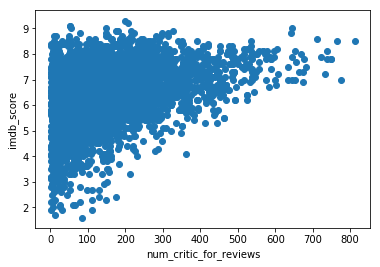

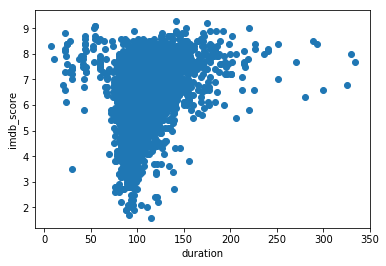

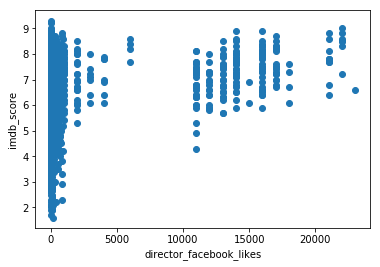

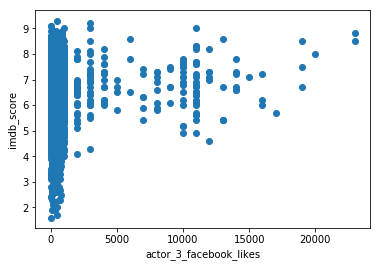

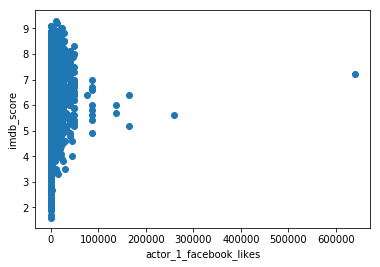

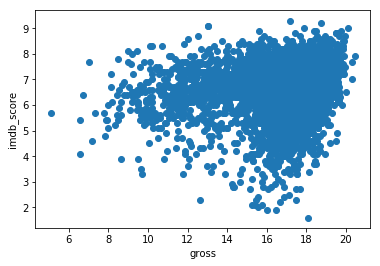

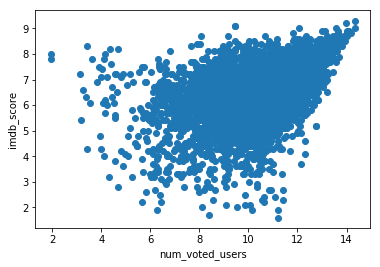

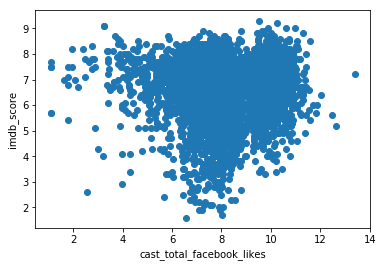

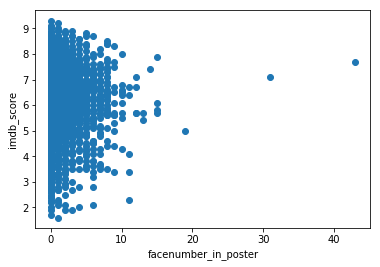

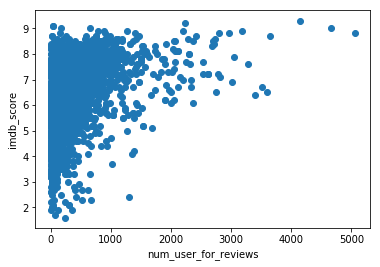

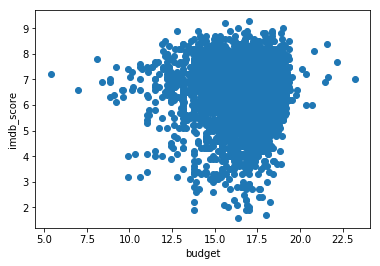

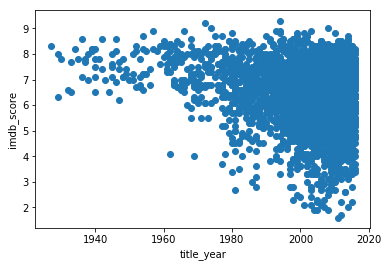

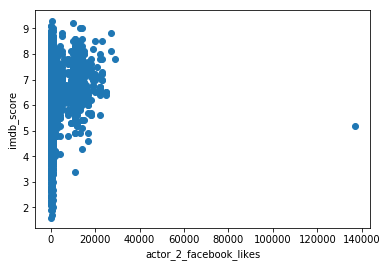

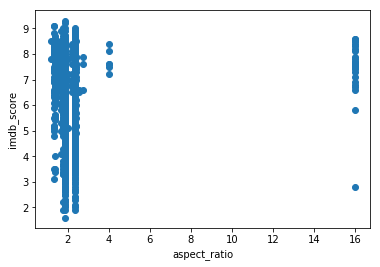

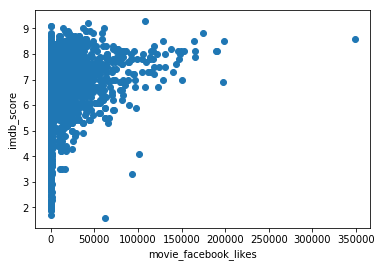

In [245]:
visualize_numeric(new_data, 'imdb_score')

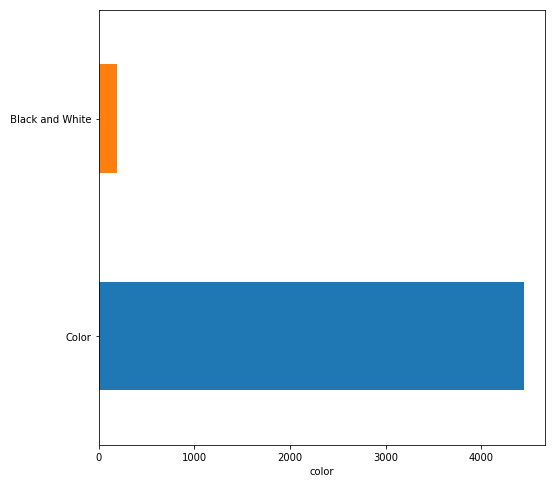

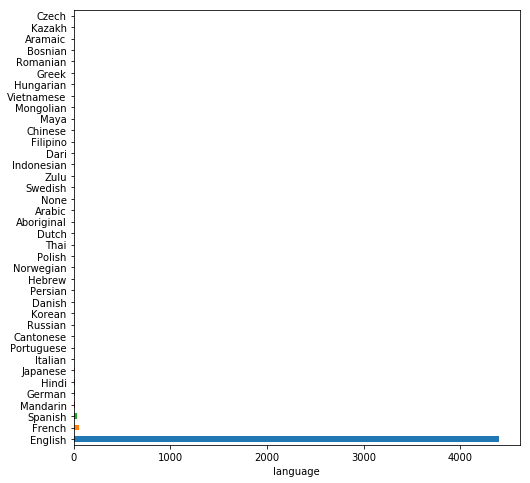

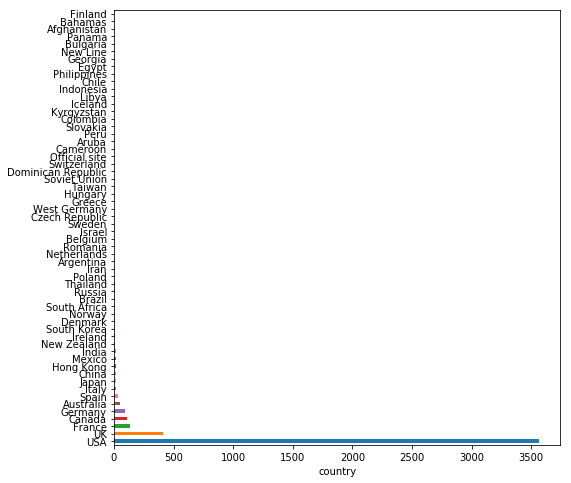

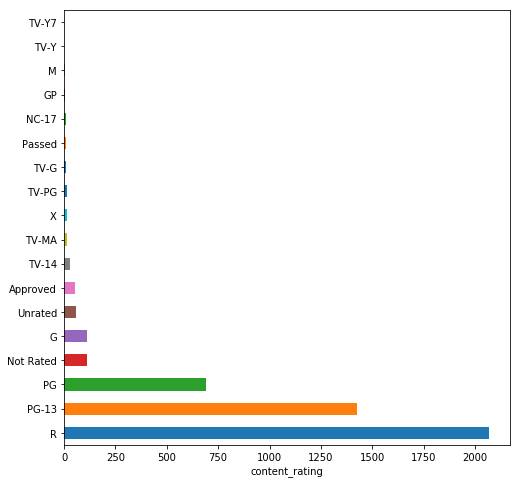

In [246]:
visualize_cat(new_data)

In [247]:
# removing aspect ratio & cast total
new_data.drop('aspect_ratio', axis=1, inplace=True)
new_data.drop('cast_total_facebook_likes', axis=1, inplace=True)

In [248]:
# removing rows with title_year under 1960
row_data = row_data[row_data.title_year >= 1960]

In [249]:
row_data.shape

(4861, 28)

In [250]:
# dealing with color
new_data.color.value_counts()/new_data.color.value_counts().sum()*100

Color               95.94303
 Black and White     4.05697
Name: color, dtype: float64

removing color column because 95% of it is Color

In [251]:
new_data.drop('color', axis=1, inplace=True)

In [252]:
new_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,53.0,855.0,1000.0,760505847.0,886204,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,178
2,602.0,148.0,53.0,161.0,11000.0,200074175.0,275868,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [253]:
# dealing with language
new_data.language.value_counts()/new_data.language.value_counts().sum()*100

English       94.864048
French         1.100561
Spanish        0.776867
Mandarin       0.366854
German         0.323694
Hindi          0.323694
Japanese       0.280535
Italian        0.194217
Portuguese     0.172637
Cantonese      0.172637
Russian        0.151057
Korean         0.151057
Danish         0.107898
Persian        0.086319
Hebrew         0.086319
Norwegian      0.086319
Polish         0.064739
Thai           0.064739
Dutch          0.064739
Aboriginal     0.043159
Arabic         0.043159
None           0.043159
Swedish        0.043159
Zulu           0.043159
Indonesian     0.043159
Dari           0.043159
Filipino       0.021580
Chinese        0.021580
Maya           0.021580
Mongolian      0.021580
Vietnamese     0.021580
Hungarian      0.021580
Greek          0.021580
Romanian       0.021580
Bosnian        0.021580
Aramaic        0.021580
Kazakh         0.021580
Czech          0.021580
Name: language, dtype: float64

grouping some values in language

In [254]:
lang_cols = new_data.language.unique()

lang_dict = {l: 'Others' for l in lang_cols if l != 'English'}
lang_dict['English'] = 'English'

new_data.language = new_data.language.map(lang_dict)

In [255]:
new_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,53.0,855.0,1000.0,760505847.0,886204,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,178
2,602.0,148.0,53.0,161.0,11000.0,200074175.0,275868,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [256]:
# dealing with coutry
new_data.country.value_counts()/new_data.country.value_counts().sum()*100

USA                   76.952956
UK                     8.826068
France                 2.870091
Canada                 2.395339
Germany                1.963746
Australia              1.100561
Spain                  0.690548
Italy                  0.410013
Japan                  0.388433
China                  0.345274
Hong Kong              0.323694
Mexico                 0.323694
India                  0.302115
New Zealand            0.280535
Ireland                0.237376
South Korea            0.237376
Denmark                0.237376
Norway                 0.172637
South Africa           0.172637
Brazil                 0.151057
Russia                 0.151057
Thailand               0.107898
Poland                 0.086319
Iran                   0.086319
Argentina              0.086319
Netherlands            0.086319
Romania                0.064739
Belgium                0.064739
Israel                 0.064739
Sweden                 0.064739
Czech Republic         0.064739
West Ger

grouping some values for countries 

In [257]:
col_country = new_data.country.unique()

dict_country = {c: 'Others' for c in col_country if c != 'USA' and c != 'UK'}
dict_country['USA'] = 'USA'
dict_country['UK'] = 'UK'

new_data.country = new_data.country.map(dict_country)

In [258]:
new_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,53.0,855.0,1000.0,760505847.0,886204,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,178
2,602.0,148.0,53.0,161.0,11000.0,200074175.0,275868,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [259]:
# categorize string columns
def categorize(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype('category').cat.as_ordered()

In [260]:
categorize(new_data)

In [261]:
# dealing with missing values
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum():
            df[name] = col.fillna(col.median())

def numericalize(df, col, name, limit):
    if not is_numeric_dtype(col) and (limit is None or limit<len(col.cat.categories)):
        df[name] = col.cat.codes
        
def proc_df(df, y_fld, limit):
    df = df.copy()
    bins = [0, 4, 7, 10]
    y = pd.cut(df[y_fld], bins)
    y = y.cat.codes
    #y.astype('int')
    df.drop(y_fld, axis=1, inplace=True)
    # dealing with numeric values
    for n,c in df.items():
        fix_missing(df, c, n)
    # dealing with cat 
    for n,c in df.items():
        numericalize(df, c, n, limit)
    res = (pd.get_dummies(df), y)
    return res

In [262]:
cleaned_data, y = proc_df(new_data, 'imdb_score', limit=3)

In [263]:
cleaned_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,language_English,language_Others,country_Others,country_UK,country_USA
0,723.0,178.0,53.0,855.0,1000.0,760505847.0,886204,0.0,3054.0,7,237000000.0,2009.0,936.0,33000,1,0,0,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,0.0,1238.0,7,300000000.0,2007.0,5000.0,178,1,0,0,0,1
2,602.0,148.0,53.0,161.0,11000.0,200074175.0,275868,1.0,994.0,7,245000000.0,2015.0,393.0,85000,1,0,0,1,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,0.0,2701.0,7,250000000.0,2012.0,23000.0,164000,1,0,0,0,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1.0,738.0,7,263700000.0,2012.0,632.0,24000,1,0,0,0,1


In [264]:
# 3 categories for the score : 
# 0 < x <= 4 : 0
# 4 < x <= 7 : 1
# 7 < x <= 10 : 2
y.head()

0    2
1    2
2    1
3    2
5    1
dtype: int8

# Model building

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import KFold, train_test_split, cross_val_score

In [266]:
# split data
X_train, X_test, y_train, y_test = train_test_split(cleaned_data, y, test_size=0.3, random_state=7)

models = []

models.append(("D Tree", DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)))
models.append(("RF", RandomForestClassifier(criterion='entropy', max_features=0.5, min_samples_leaf=3, n_jobs=-1, n_estimators=200)))
models.append(("NB", MultinomialNB()))
models.append(("KNN", KNeighborsClassifier(n_jobs=-1)))

In [267]:
# train 
for n,m in models:
    kfold = KFold(n_splits=10, random_state=7)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(y_pred)
    print(f"Cross Val => {n} : {np.mean(cross_val_score(m, cleaned_data, y, cv=kfold, scoring='accuracy'))}")
    print(f'{confusion_matrix(y_test, y_pred)}')
    print(f"Score => {n} : {m.score(X_test, y_test)} ")
    print('-'*20)

[1 1 1 ... 2 1 1]
Cross Val => D Tree : 0.6993548447158711
[[  8  20   2]
 [ 38 772 134]
 [  5 149 263]]
Score => D Tree : 0.7498202731847592 
--------------------
[1 1 1 ... 2 1 1]
Cross Val => RF : 0.7891315074104417
[[  0  29   1]
 [  0 884  60]
 [  0 179 238]]
Score => RF : 0.8066139468008627 
--------------------
[2 1 2 ... 2 1 2]
Cross Val => NB : 0.45911316749832426
[[  3  14  13]
 [ 95 472 377]
 [ 38 143 236]]
Score => NB : 0.5111430625449317 
--------------------
[1 1 1 ... 2 1 1]
Cross Val => KNN : 0.6207869404930365
[[  4  21   5]
 [ 14 782 148]
 [  3 302 112]]
Score => KNN : 0.6455787203450755 
--------------------


### It looks like Random Forest gives the best score!

In [268]:
def rsme(x, y):
    err = np.sqrt(np.mean((x-y)**2))
    return err

In [269]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)


In [270]:
model = RandomForestClassifier(criterion='entropy', max_features=0.6, min_samples_leaf=1, n_jobs=-1, n_estimators=200)
model.fit(X_train, y_train)
fi = rf_feat_importance(model, cleaned_data)
fi

,cols,imp
6,num_voted_users,0.169815
1,duration,0.113667
10,budget,0.097881
11,title_year,0.070730
8,num_user_for_reviews,0.068386
5,gross,0.068366
0,num_critic_for_reviews,0.061722
3,actor_3_facebook_likes,0.056584
13,movie_facebook_likes,0.055181
2,director_facebook_likes,0.052167


In [278]:
to_keep = fi[fi.imp>0.05].cols
to_keep

6             num_voted_users
1                    duration
10                     budget
11                 title_year
8        num_user_for_reviews
5                       gross
0      num_critic_for_reviews
3      actor_3_facebook_likes
13       movie_facebook_likes
2     director_facebook_likes
4      actor_1_facebook_likes
Name: cols, dtype: object

In [279]:

def pred(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(criterion='entropy', max_features=0.5, min_samples_leaf=2, n_jobs=-1, n_estimators=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.score(X_test, y_test))
    print(accuracy_score(y_test, y_pred))
    print(rsme(y_test, y_pred))
    print(f'{confusion_matrix(y_test, y_pred)}')

In [280]:
pred(X_train, X_test, y_train, y_test)

0.807332854061826
0.807332854061826
0.4462480378520941
[[  1  27   2]
 [  1 875  68]
 [  1 169 247]]


In [281]:
row_df = cleaned_data[to_keep]
X_train_to_keep = X_train[to_keep]
X_test_to_keep = X_test[to_keep]

In [282]:
pred(X_train_to_keep, X_test_to_keep, y_train, y_test)

0.8109273903666427
0.8109273903666427
0.4422021878982818
[[  1  27   2]
 [  0 881  63]
 [  1 170 246]]


In [283]:
from scipy.cluster import hierarchy as hc
import scipy

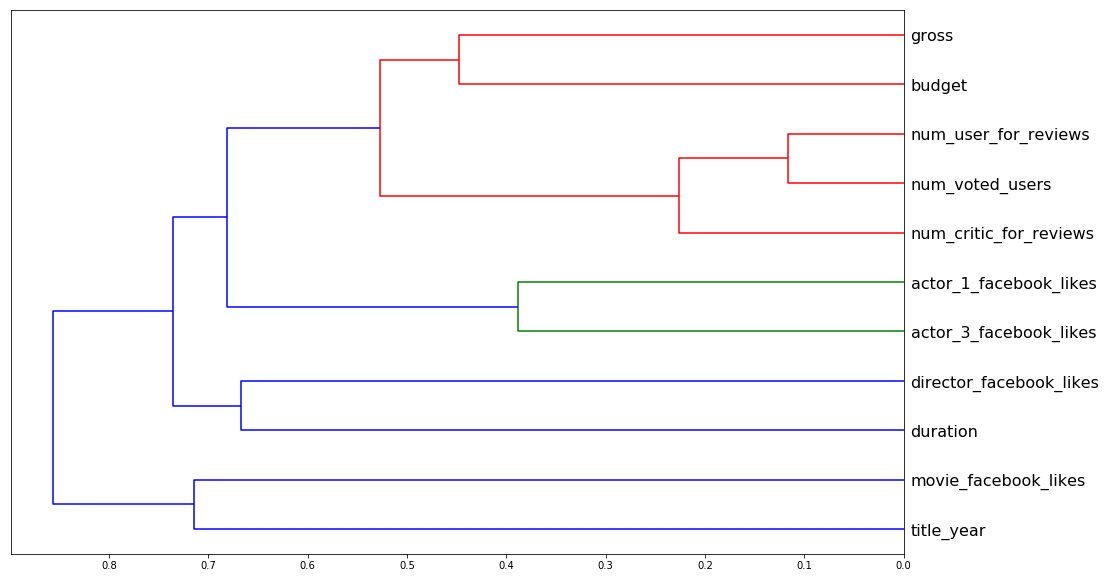

In [284]:
corr = np.round(scipy.stats.spearmanr(row_df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=row_df.columns, 
      orientation='left', leaf_font_size=16)
plt.show()